# DBSCAN Clustering on Moons Dataset

In [2]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons


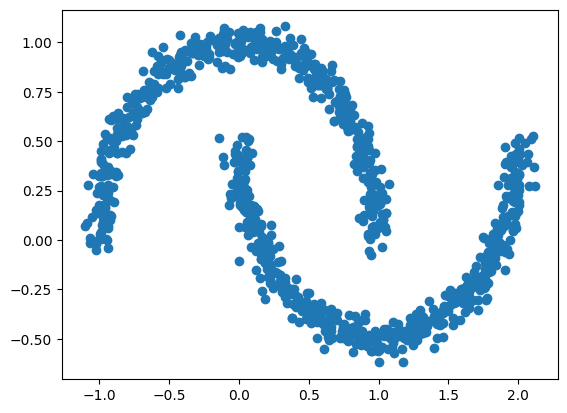

In [5]:
# Generate moon-shaped data with noise
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [6]:
# Apply DBSCAN with initial parameters
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

# Print the first 10 cluster labels and core sample indices
print("Cluster Labels (first 10):", dbscan.labels_[:10])
print("Core Sample Indices (first 10):", dbscan.core_sample_indices_[:10])

Cluster Labels (first 10): [ 0  2 -1 -1  1  0  0  0  2  5]
Core Sample Indices (first 10): [ 0  4  5  6  7  8 10 11 12 13]


## Plotting the DBSCAN results

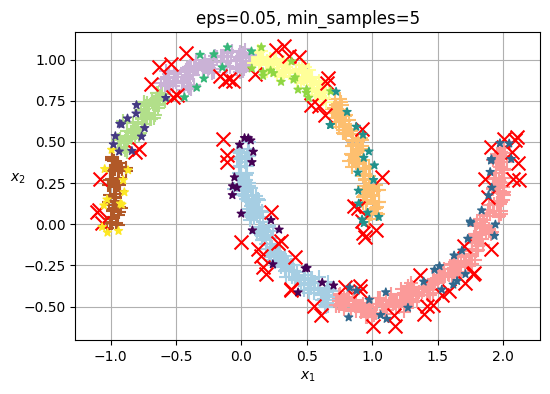

In [12]:

# Define function to plot DBSCAN results
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='+', s=size, cmap="Paired")
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker="*")

    if show_xlabels:
        plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

# Plotting the results for DBSCAN with eps=0.05
plt.figure(figsize=(6, 4))
plot_dbscan(dbscan, X, size=100)
plt.show()


## Applying DBSCAN with a larger `eps` value

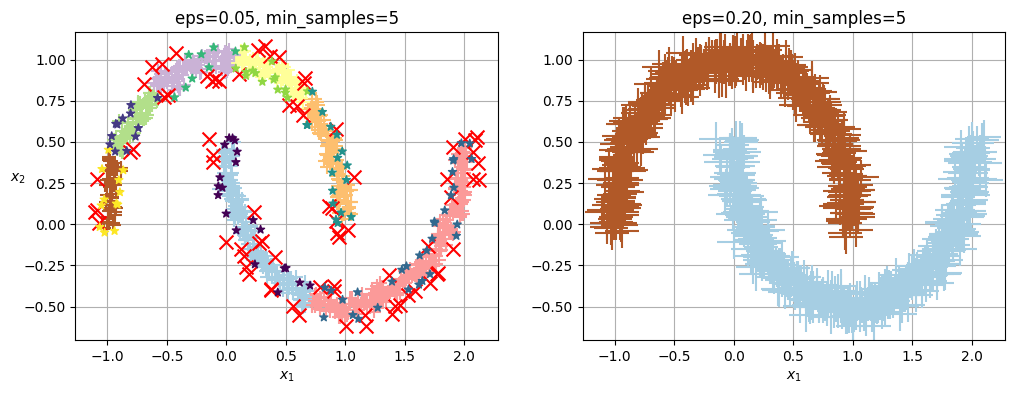

In [13]:

# Create a new DBSCAN instance with a larger `eps` value (more lenient clustering)
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

# Plotting comparison
fig = plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_dbscan(dbscan, X, size=100)
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
plt.show()
